<a href="https://colab.research.google.com/github/TracyJi816/Waste-Management/blob/main/case_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import files
import pandas as pd

# Upload a file from your local system
uploaded = files.upload()

# Load the uploaded file into a DataFrame
# Assuming the file is an Excel file
df = pd.read_excel(list(uploaded.keys())[0])

# Display the first few rows of the DataFrame
df.head()







Saving 391510.xlsx to 391510.xlsx


,Country,Time,Aggregated SWT (kg)
0,Australia,2002,0
1,Australia,2003,17832
2,Australia,2004,29555
3,Australia,2005,0
4,Australia,2006,0


In [13]:
#Remove Slovakia's data and update Costa Rica as an OECD member
df_updated = df[df['Country'] != 'Slovakia']
df_updated.loc[df_updated['Country'] == 'Costa Rica', 'OECD_Status'] = 'OECD'

<ipython-input-13-c6f87aad53bc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_updated.loc[df_updated['Country'] == 'Costa Rica', 'OECD_Status'] = 'OECD'


In [14]:
# Create a pivot table to compare each country's export volume over time (chronological order)
country_time_pivot_updated = df_updated.pivot_table(values='Aggregated SWT (kg)', index='Time', columns='Country', aggfunc='sum', fill_value=0)

# Sorting columns alphabetically for better comparison
country_time_pivot_updated = country_time_pivot_updated.reindex(sorted(country_time_pivot_updated.columns), axis=1)


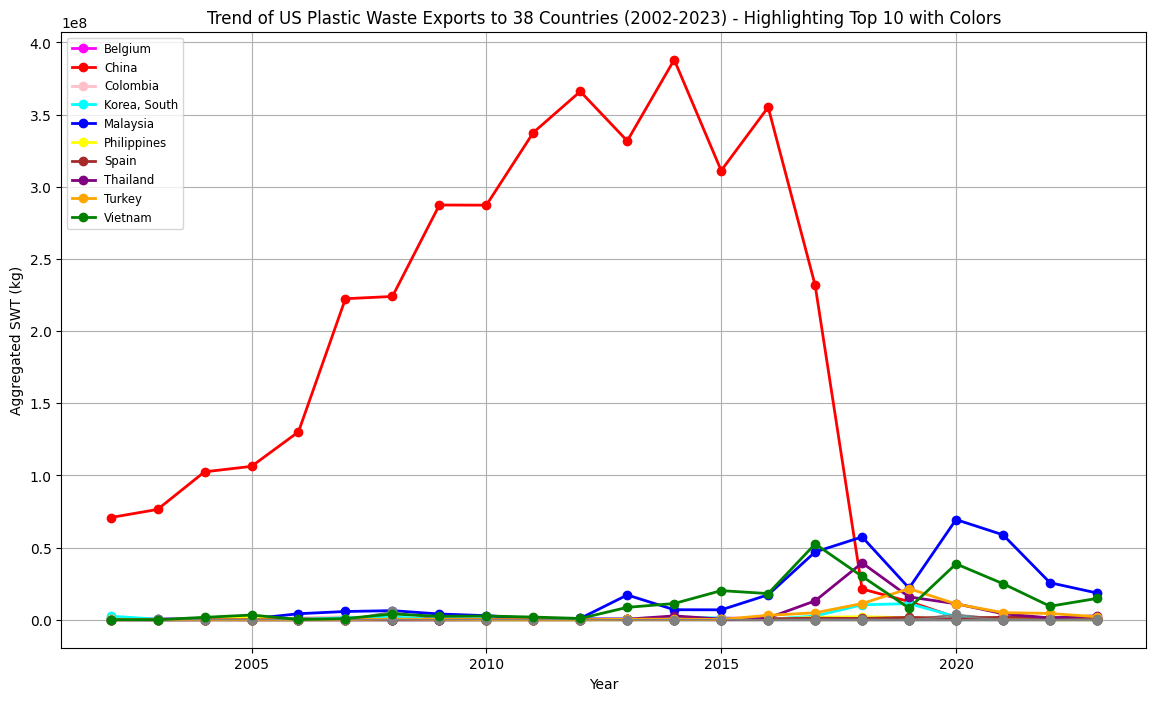

In [16]:
import matplotlib.pyplot as plt

# Define the top 10 countries by total export volume
top_10_countries = country_time_pivot_updated.sum().sort_values(ascending=False).head(10).index

# Assigning colors to the top 10 countries
colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'brown', 'pink']
color_mapping = dict(zip(top_10_countries, colors))

# Create the plot
plt.figure(figsize=(14, 8))

# Plot all countries, highlighting the top 10 with different colors
for country in country_time_pivot_updated.columns:
    plt.plot(country_time_pivot_updated.index, country_time_pivot_updated[country], linestyle='-', marker='o',
             color=color_mapping[country] if country in top_10_countries else 'gray',
             linewidth=2 if country in top_10_countries else 1,
             label=country if country in top_10_countries else "")

# Adding titles and labels
plt.title('Trend of US Plastic Waste Exports to 38 Countries (2002-2023) - Highlighting Top 10 with Colors')
plt.xlabel('Year')
plt.ylabel('Aggregated SWT (kg)')
plt.grid(True)

# Adding a legend for the top 10 countries
plt.legend(loc='upper left', fontsize='small')

# Display the plot
plt.show()


In [17]:
from google.colab import files
import pandas as pd

# Upload a file from your local system
uploaded = files.upload()

# Load the uploaded file into a DataFrame
# Assuming the file is an Excel file
df = pd.read_excel(list(uploaded.keys())[0])

# Display the first few rows of the DataFrame
df.head()

Saving 391530.xlsx to 391530.xlsx


,Country,Time,Aggregated SWT (kg),Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Australia,2002,0,NaN,NaN,NaN,NaN,NaN
1,Australia,2003,0,NaN,NaN,NaN,NaN,NaN
2,Australia,2004,0,NaN,NaN,NaN,NaN,NaN
3,Australia,2005,0,NaN,NaN,NaN,NaN,NaN
4,Australia,2006,0,NaN,NaN,NaN,NaN,NaN


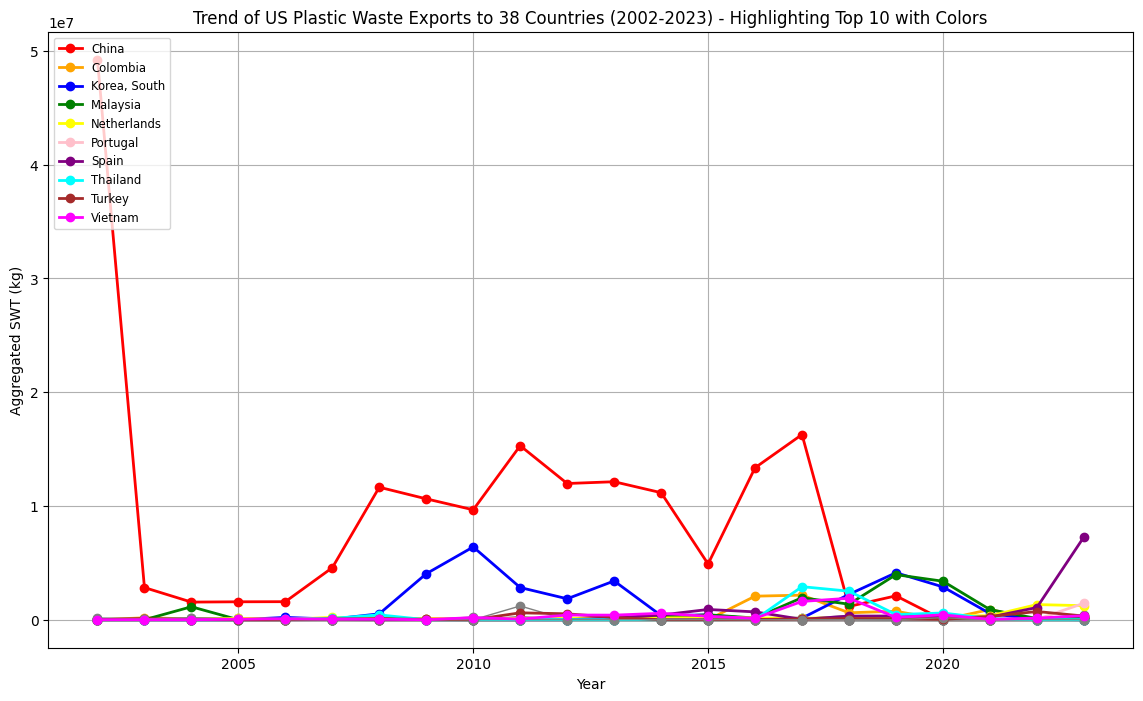

Country
China           181948934
Korea, South     30124214
Malaysia         14240829
Spain            11693558
Colombia          7449760
Thailand          7181377
Vietnam           6960460
Netherlands       5104288
Turkey            3276214
Portugal          1642494
dtype: int64


In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (replace the path with your actual file path)
file_path = '391530.xlsx'
df = pd.read_excel(file_path)

# Create a pivot table to compare each country's export volume over time (chronological order)
country_time_pivot = df.pivot_table(values='Aggregated SWT (kg)', index='Time', columns='Country', aggfunc='sum', fill_value=0)

# Sorting columns alphabetically for better comparison
country_time_pivot = country_time_pivot.reindex(sorted(country_time_pivot.columns), axis=1)

# Identify the top 10 countries by total export volume
top_10_countries = country_time_pivot.sum().sort_values(ascending=False).head(10).index

# Visualizing the trends for all countries, highlighting the top 10 with different colors
plt.figure(figsize=(14, 8))

# Assigning colors to the top 10 countries
colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'brown', 'pink']
color_mapping = dict(zip(top_10_countries, colors))

# Plot all countries
for country in country_time_pivot.columns:
    plt.plot(country_time_pivot.index, country_time_pivot[country], linestyle='-', marker='o',
             color=color_mapping[country] if country in top_10_countries else 'gray',
             linewidth=2 if country in top_10_countries else 1,
             label=country if country in top_10_countries else "")

plt.title('Trend of US Plastic Waste Exports to 38 Countries (2002-2023) - Highlighting Top 10 with Colors')
plt.xlabel('Year')
plt.ylabel('Aggregated SWT (kg)')
plt.grid(True)
plt.legend(loc='upper left', fontsize='small')
plt.show()

# To display the top 10 countries and their volumes
top_10_countries_volumes = country_time_pivot.sum().sort_values(ascending=False).head(10)
print(top_10_countries_volumes)
